In [12]:
'''DIY LSTM cell, we need this as a precursor to building the 3D conv LSTM unit for the R2N2 net'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


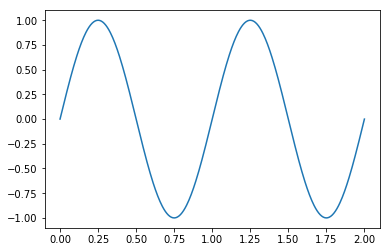

(20, 128)


In [100]:
# a good way to test any RNN is to use a simple periodic function sin(x)

Xt = np.linspace(0, 2, 400);
Yt = np.sin(2*np.pi*Xt);
plt.figure();
plt.plot(Xt, Yt);
plt.show()
print(xt.shape)

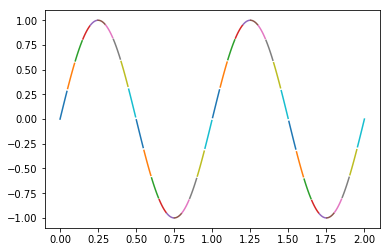

In [113]:
#partition Xt into multiple subsequences, which will be what the lstm learns on
subsequence_length = 10;
num_subsequences = int(400/subsequence_length)
x_seq = [];
y_seq = [];
plt.figure(); 
for i in range(num_subsequences):
    start = i*subsequence_length; end = (i+1)*subsequence_length;
    subsequence = Xt[start:end];
    x_seq.append(subsequence);
    y_seq.append(Yt[start:end])
    plt.plot(subsequence, Yt[start:end]);
plt.show();

In [90]:
# Create the weights for the LSTM
#forget gate
batch_size = 128;

# H = size of the hidden state in the LSTM unit
H = 20; #the hidden state must alwasy be the same size as the length of the input (number of time steps)


time_series_length = len(Xt);
#do a random initialization of ht
ht = tf.Variable(tf.zeros([10]), name="hidden_state")

#must have size as
Ct = tf.Variable(tf.random_normal([H, batch_size], stddev=0.35), name = 'cell_state')

## all of these weights act on the concatenated [h_(t-1), xt]
# xt has shape (batch_size, feature_size)
Whf = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Whf")
Wxf = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Wxf")
bf = tf.Variable(tf.zeros([H,1]), name="biases")

#input gate
Whi = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Whi")
Wxi = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Wxi")
bi = tf.Variable(tf.zeros([H,1]), name="biases")

#cell gate
Whc = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Whc")
Wxc = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Wxc")
bc = tf.Variable(tf.zeros([H,1]), name="biases")

#output gate
Who = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Who")
Wxo = tf.Variable(tf.random_normal([H, time_series_length], stddev=0.35),
                      name="Wxo")
bo = tf.Variable(tf.zeros([H,1]), name="biases")

print(Whf.shape)

(20, 20)


In [91]:
## calculate all the necessary internal state variables

#first variables are the linear parts
    
Zf = tf.add(tf.add(tf.matmul(Whf, ht1), tf.matmul(Wxf, xt)),bf);
print(Zf.shape)
Zi = tf.add(tf.add(tf.matmul(Whi, ht1), tf.matmul(Wxi, xt)),bi);
Zc = tf.add(tf.add(tf.matmul(Whc, ht1), tf.matmul(Wxc, xt)),bc);
Zo = tf.add(tf.add(tf.matmul(Who, ht1), tf.matmul(Wxo, xt)),bo);

#now apply the activations
ft = tf.nn.sigmoid(Zf)
it = tf.nn.sigmoid(Zi)
Ct_interim = tf.nn.tanh(Zc); #interim cell state
print(Ct_interim.shape)

#all of these are hadamard multiplies, not matrix multplies
# so it, ft, and all Cts should have the same shape
Ct = np.add(np.multiply(ft, Ct), np.multiply(it,Ct_interim)); #update cell state

#setup output
ot = tf.nn.sigmoid(Zo);
ht = tf.multiply(ot, tf.nn.tanh(Ct)); #hadamard, not matrix multiply

#should return the new hidden state and 
new_hidden = tf.multiply(ot, tf.nn.tanh(Ct))


(20, 128)
(20, 128)


In [92]:
def lstm_cell(ht1, xt, Ct):
    '''
    single cell of the lstm
    '''
    
    Zf = tf.add(tf.add(tf.matmul(Whf, ht1), tf.matmul(Wxf, xt)),bf);
    print(Zf.shape)
    Zi = tf.add(tf.add(tf.matmul(Whi, ht1), tf.matmul(Wxi, xt)),bi);
    Zc = tf.add(tf.add(tf.matmul(Whc, ht1), tf.matmul(Wxc, xt)),bc);
    Zo = tf.add(tf.add(tf.matmul(Who, ht1), tf.matmul(Wxo, xt)),bo);

    #now apply the activations
    ft = tf.nn.sigmoid(Zf)
    it = tf.nn.sigmoid(Zi)
    Ct_interim = tf.nn.tanh(Zc); #interim cell state
    Ct = np.add(np.multiply(ft, Ct), np.multiply(it,Ct_interim)); #update cell state
    
    #setup output
    ot = tf.nn.sigmoid(Zo);
    ht = tf.multiply(ot, tf.nn.tanh(Ct)); #hadamard, not matrix multiply
    
    #should return the new hidden state and new cell state
    return ht, Ct;

#print(lstm_cell(ht1, xt))

In [118]:
def lstm_chain(ht1, x_sequences, num_units):
    ''' uses lstm_cell multiple times, with multiple being num_units
    x_sequences: list of x_ts; length of x_sequences must be num_units
    '''
    assert num_units == len(x_sequences), 'num_units not equal to len of x_seq'
    ht = ht1; ot = xt;
    Ct = tf.Variable(tf.random_normal([H, batch_size], stddev=0.35), name = 'cell_state')

    for i in range(num_units):
        ht, Ct = lstm_cell(xt, ht, Ct); #xt is always an external input
        # the output has to be re transposes;
        
num_units = num_subsequences;
print(xt.shape); print(xt.shape); #xt and ht initially are batches of 20 dimensional vectors..
print(lstm_chain(ht1, x_seq, num_units));

(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
(20, 128)
None


In [ ]:
#test; three placeholders for the cell state, hidden state, and the input sequence
ht1 = tf.placeholder(tf.float32, shape = [time_series_length, batch_size])
xt = tf.placeholder(tf.float32, shape = [time_series_length, batch_size])
Ct = tf.placeholder(tf.float32, shape = [H, batch_size], name = 'cell_state')

sess = tf.Session();
init = tf.global_variables_initializer();
sess.run(init);

#just use mean_squared loss

